In [42]:
!pip install matplotlib




  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/59/c7/f8da659997fe3210fdda689cf2d7720b3a079578fb8aecc3623c4e091a77/matplotlib-3.8.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/75/d4/c3b7a9a0d1f99b528e5a46266b0b9f13aad5a0dd1156d071418df314c427/contourpy-1.1.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/24/01/9bb5e115206b5c7f7894978f9af57a3d17c94fbc0df913389f1eaf334a68/fonttools-4.43.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:-

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\share'
Consider using the `--user` option or check the permissions.



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
dtype_options = {'fulfilled-by': 'str'}
data = pd.read_csv("Amazon Sale Report.csv", dtype=dtype_options, low_memory=False)

In [11]:
print(data.head())


   index             Order ID      Date                        Status   
0      0  405-8078784-5731545  04-30-22                     Cancelled  \
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU   
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S  \
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state   
0            Set  ...      INR  647.

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [14]:
# Remove duplicate rows
data = data.drop_duplicates()



In [15]:
# Standardize values in a column
data['Fulfilment'] = data['Fulfilment'].str.lower().str.strip()


In [16]:
# Example: Impute missing values in 'Courier Status' with the mode
data['Courier Status'] = data['Courier Status'].fillna(data['Courier Status'].mode()[0])

# Example: Drop rows with missing values in 'ship-city'
data = data.dropna(subset=['ship-city'])


In [17]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency               7793
Amount                 7793
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         49145
B2B                       0
fulfilled-by          89678
Unnamed: 22           49037
dtype: int64


In [19]:
# Impute missing values in 'currency' with the mode or a specific category
data['currency'].fillna(data['currency'].mode()[0] if data['currency'].dtype == 'O' else 'Unknown', inplace=True)



In [20]:
# Impute missing values in 'Amount' with the mean
data['Amount'].fillna(data['Amount'].mean(), inplace=True)


In [22]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)



index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         49145
B2B                       0
fulfilled-by          89678
Unnamed: 22           49037
dtype: int64


In [23]:
data['PromotionApplied'] = data['promotion-ids'].notna().astype(int)


In [25]:
# Check for the presence of a specific promotion identifier
data['HasSpecificPromotion'] = data['promotion-ids'].fillna('').str.contains('SpecificPromotionIdentifier').astype(int)


In [26]:
# Count the total number of promotions applied
data['TotalPromotions'] = data['promotion-ids'].str.count(',') + 1


In [27]:
data.drop(columns=['promotion-ids'], inplace=True)


In [29]:
# Fill missing values with a default value and remove extra whitespaces
data['fulfilled-by'] = data['fulfilled-by'].fillna('Unknown').str.strip()

In [31]:
# Drop the 'Unnamed: 22' column
data.drop(columns=['Unnamed: 22'], inplace=True)


In [33]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


index                       0
Order ID                    0
Date                        0
Status                      0
Fulfilment                  0
Sales Channel               0
ship-service-level          0
Style                       0
SKU                         0
Category                    0
Size                        0
ASIN                        0
Courier Status              0
Qty                         0
currency                    0
Amount                      0
ship-city                   0
ship-state                  0
ship-postal-code            0
ship-country                0
B2B                         0
fulfilled-by                0
PromotionApplied            0
TotalPromotions         49145
HasSpecificPromotion        0
dtype: int64


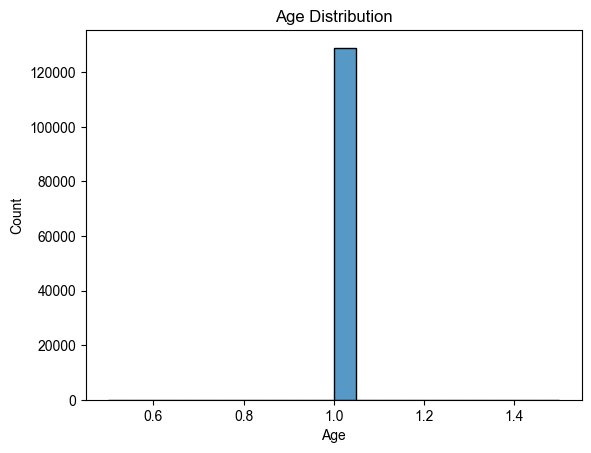

In [38]:
# Assuming you have a 'Date' column
data['Age'] = (pd.Timestamp.now() - pd.to_datetime(data['Date'])) // pd.Timedelta(days=365.25)
sns.histplot(data['Age'], bins=20)
sns.set(style='whitegrid')  # Optional: Set a seaborn style
plt.title('Age Distribution')
plt.show()

In [46]:
# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()



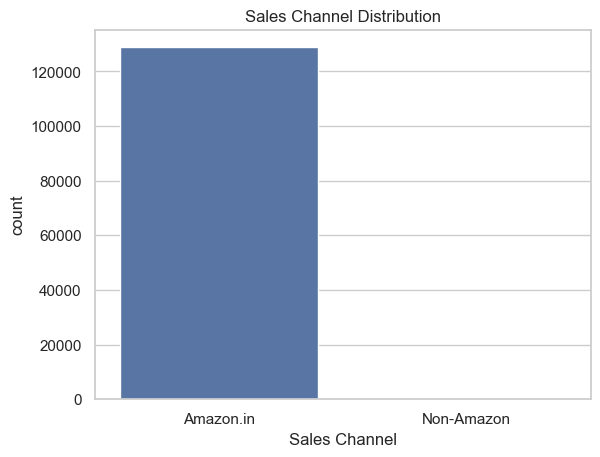

In [47]:
sns.countplot(x='Sales Channel', data=data)
plt.title('Sales Channel Distribution')
plt.show()


In [43]:
# Assuming 'data' is your DataFrame
column_names = data.columns

# Print or display the column names
print(column_names)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by',
       'PromotionApplied', 'TotalPromotions', 'HasSpecificPromotion', 'Age'],
      dtype='object')


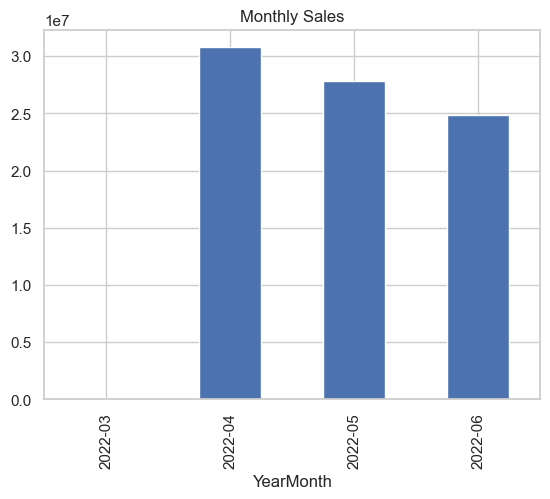

In [44]:
# Extract month and year from 'Date'
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['Amount'].sum()
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.show()


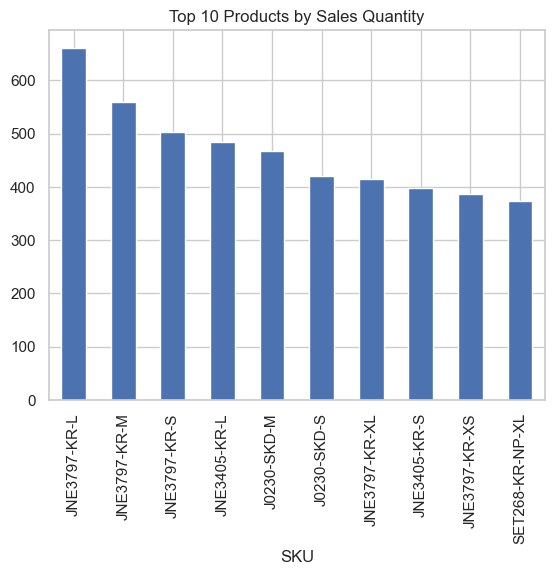

In [48]:
# Identify top N products based on sales quantity or amount
top_products = data.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales Quantity')
plt.show()


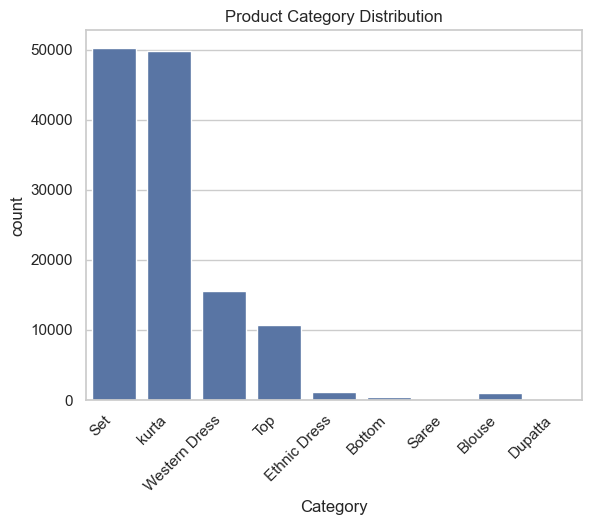

In [49]:
# Visualize sales distribution across different product categories
sns.countplot(x='Category', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Product Category Distribution')
plt.show()


In [50]:
data['Date'] = pd.to_datetime(data['Date'])


#  a Time Series Plot:

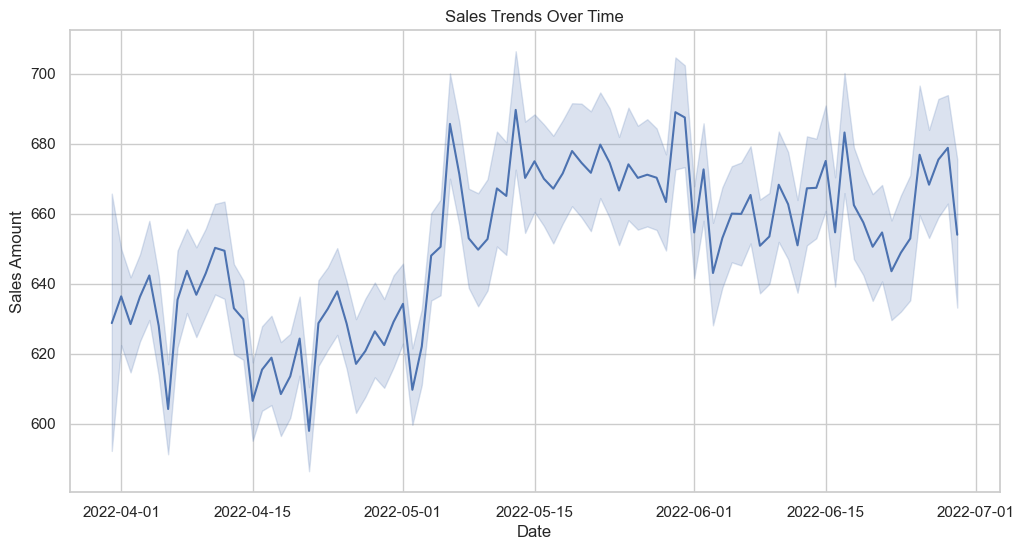

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()


# Aggregate Sales by Date:

In [52]:
daily_sales = data.groupby('Date')['Amount'].sum().reset_index()


# Plot Aggregated Sales:

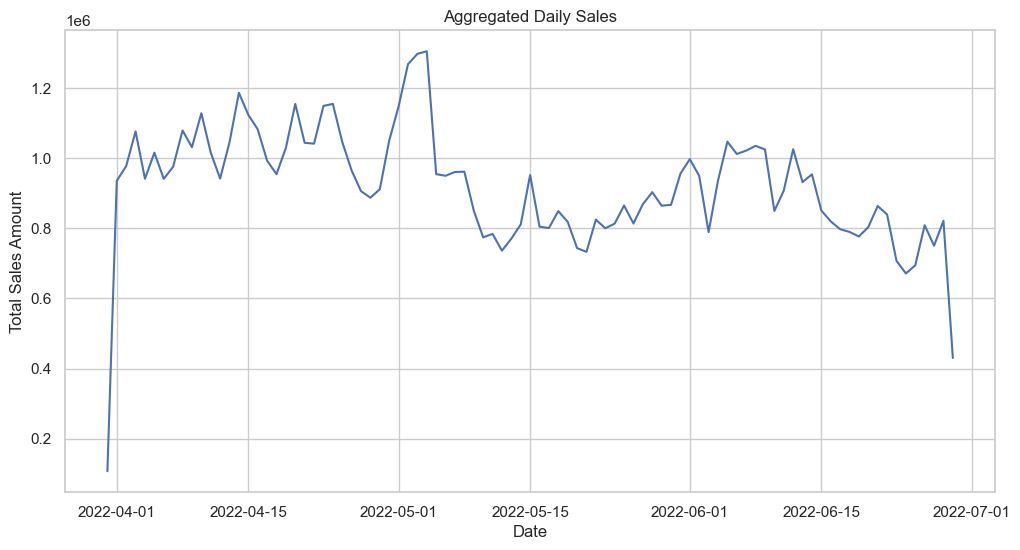

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=daily_sales)
plt.title('Aggregated Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


# Identify Peak Sales Periods:

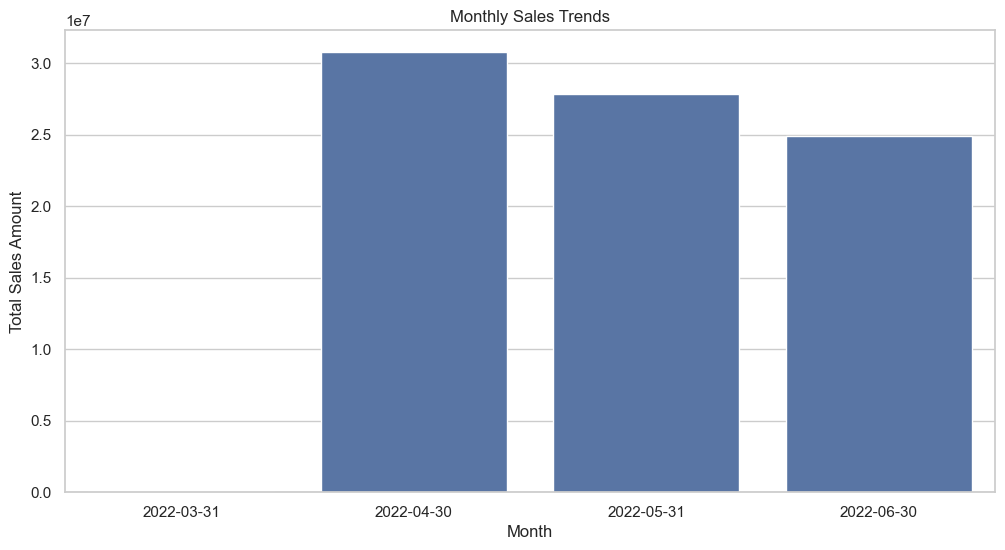

In [65]:
monthly_sales = data.resample('M', on='Date')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


# Correlation Matrix:

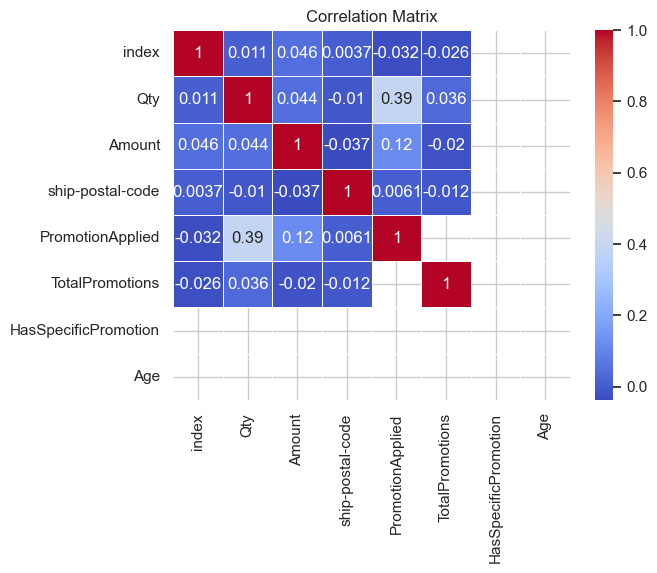

In [66]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlataion_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Pairplot:

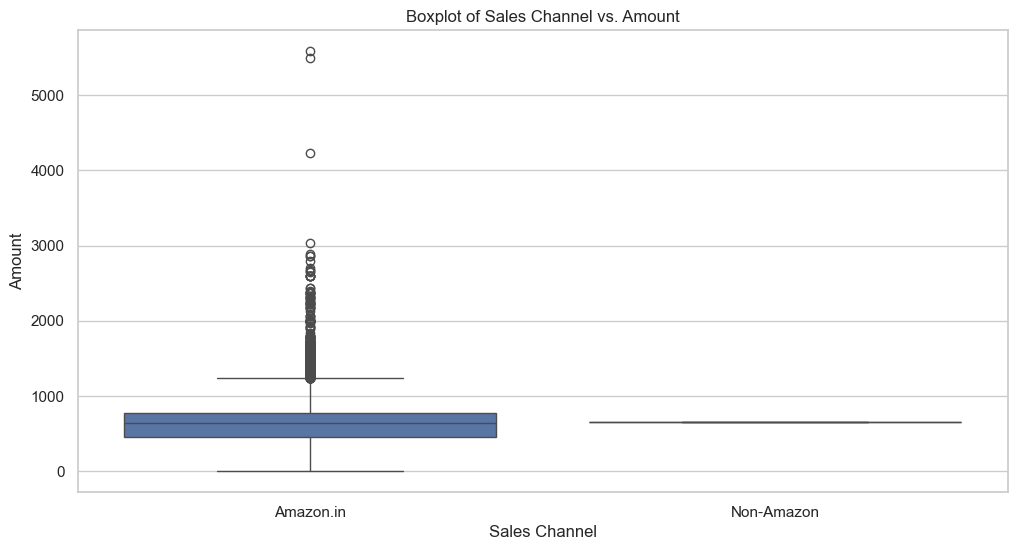

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales Channel', y='Amount', data=data)
plt.title('Boxplot of Sales Channel vs. Amount')
plt.show()


# Categorical Plots:

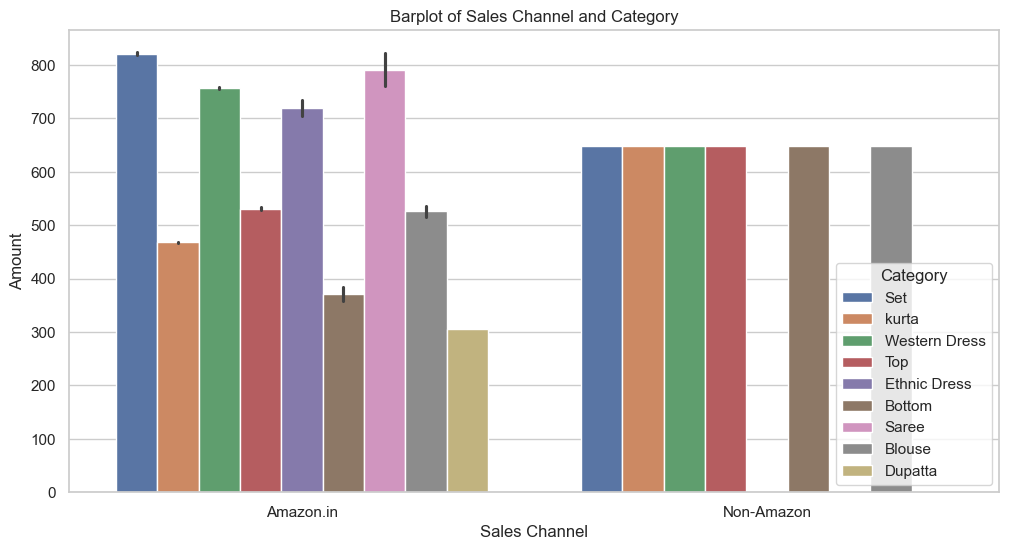

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Channel', y='Amount', hue='Category', data=data)
plt.title('Barplot of Sales Channel and Category')
plt.show()


# Statistical Tests: (e.g., t-test, ANOVA) 

In [68]:
from scipy.stats import ttest_ind, f_oneway

group1 = data[data['Sales Channel'] == 'Channel1']['Amount']
group2 = data[data['Sales Channel'] == 'Channel2']['Amount']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test: t_stat={t_stat}, p_value={p_value}')


        

T-test: t_stat=nan, p_value=nan
